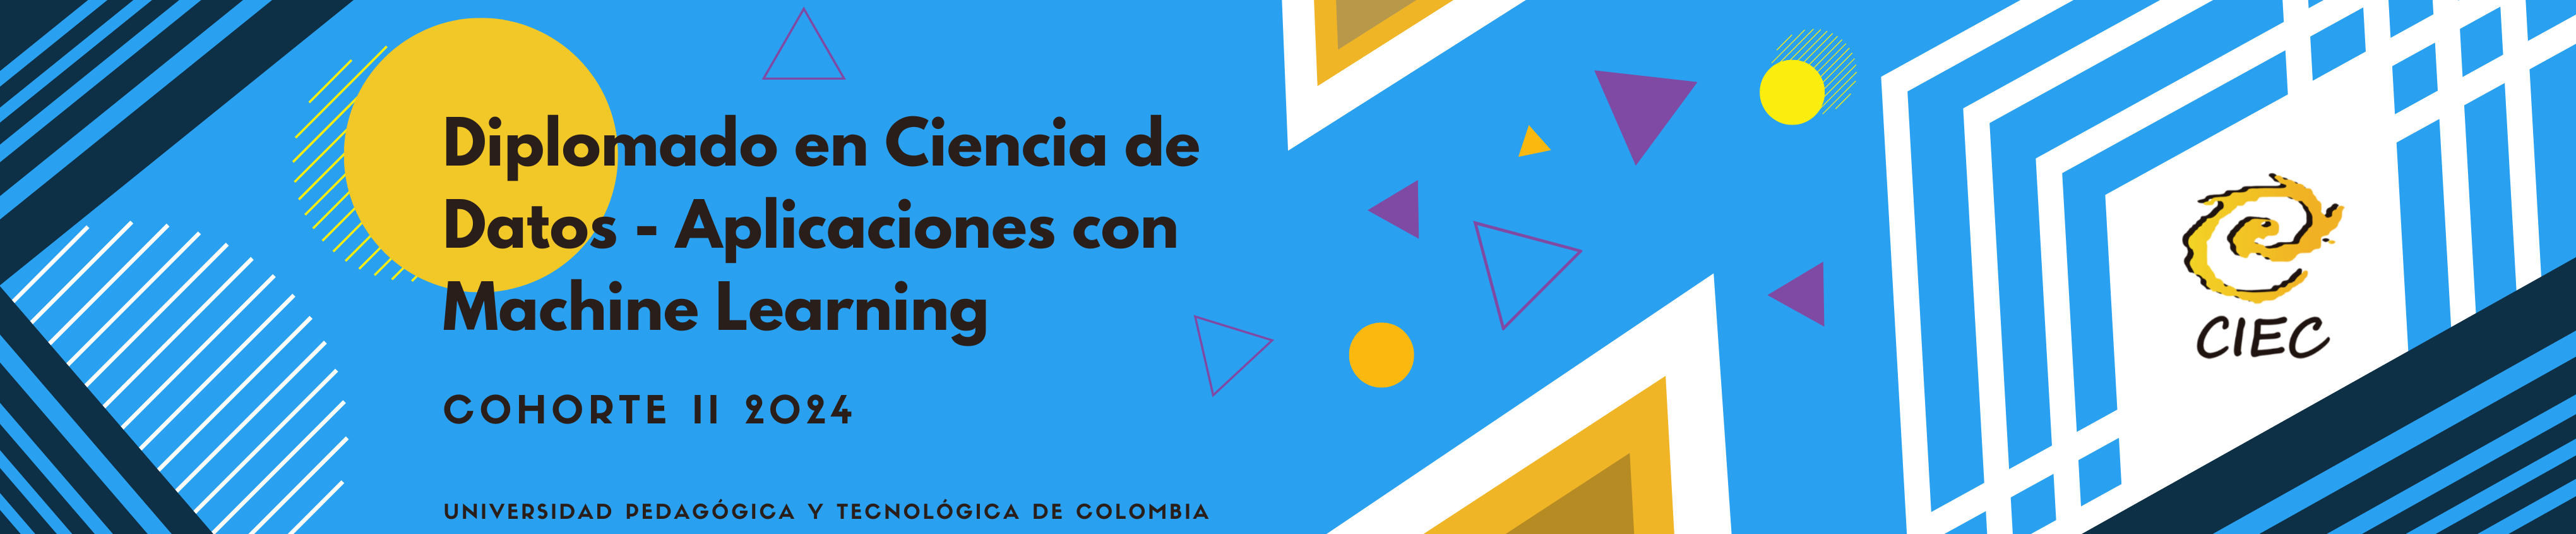

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 style="color: #FECB05; text-align: center;">  Entrenamiento de una red neuronal artifical </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Descenso de gradiente</span>](#dim-curse)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h1 style="color: #007ACC;"> Introducción </h1>

La optimización de funciones matemáticas es fundamental en el entrenamiento de redes neuronales artificiales, ya que permite ajustar los pesos y sesgos de la red para minimizar una función de pérdida. Esta función de pérdida evalúa qué tan bien la red está realizando la tarea deseada en un conjunto de datos de entrenamiento. Utilizando algoritmos de optimización como el descenso de gradiente, la red ajusta sus parámetros en cada iteración del entrenamiento para mejorar su desempeño. La optimización busca encontrar los valores óptimos de los parámetros que minimizan la función de pérdida, lo que implica que la red se adapta mejor a los datos de entrenamiento y generaliza bien a datos no vistos. En resumen, la optimización de funciones matemáticas en el contexto de las redes neuronales artificiales es crucial para mejorar su capacidad de aprendizaje y rendimiento en diversas tareas.

En tareas de regresión, típicamente queremos resolver el problema

$$MSE = \frac{1}{N} \sum_{i = 1}^{N} \left( y_{i} - \hat{y}_{i} \right)^{2}$$

- $N$: Número de observaciones

- $y$: variable de respuesta

- $\hat{y}$: predicción de la variable de respuesta

En tareas de clasificación, la función objetivo típicamente es

$$CE = - \frac{1}{N} \sum_{i = 1}^{N} \sum_{j = 1}^{K} y_{ij} log(\hat{y}_{ij})$$

- $N$: Número de observaciones

- $K$: Número de clases

- $y_{ij}$: variable binaria $1$ si la observación $i$ pertenece a la clase $j$, 0 en caso contrario

- $\hat{y}_{ij}$: es la probabilidad predicha de que la observación $i$ pertenezca a la clase $j$

Para ambos casos, el vector $\mathbf{\hat{y}}$ corresponde a una función de los parámetros del modelo utilizado. En el caso de las redes neuronales artificiales, entre más capas ocultas y mayor número de neuronas más complicada es esta función y mayor número de variables tendrá. Y, dado que, usualmente definimos muchas funciones de activación no lineales, la optimización de esta función se complica y debemos contar con algoritmos eficientes para soluciones el problema de optimización.

<h2 style="color: #007ACC;"> Decenso del gradiente </h2>

El problema del descenso de gradiente es un algoritmo de optimización utilizado para encontrar el mínimo global de una función, en nuestro caso, la función de pérdida $L(\mathbf{w})$, donde $\mathbf{w})$ representa los parámetros del modelo que queremos ajustar para minimizar la pérdida. 

El descenso de gradiente se basa en la idea de iterativamente ajustar los parámetros en la dirección opuesta al gradiente de la función de pérdida. El gradiente de una función es un vector que indica la dirección en la cual la función crece más rápidamente. Por lo tanto, al moverse en la dirección opuesta al gradiente, podemos descender hacia un mínimo de la función.

El algoritmo del descenso de gradiente se define de la siguiente manera:

1. Inicializar los parámetros $\mathbf{w}$ con valores aleatorios o algún valor inicial predefinido.
2. Calcular el gradiente de la función de pérdida con respecto a los parámetros $w$: $\nabla_{\mathbf{w}} L(\mathbf{w})$
3. Actualizar los parámetros $\mathbf{w}$ en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje $\eta$: $\mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w})$.
4. Repetir los pasos 2 y 3 hasta que se cumpla un criterio de detención, como alcanzar un número máximo de iteraciones o cuando la mejora en la función de pérdida sea mínima.

Este proceso de actualización de los parámetros se repite iterativamente hasta que se alcanza la convergencia y se encuentra un mínimo local o global de la función de pérdida. La tasa de aprendizaje ($\eta$) es un hiperparámetro que controla la magnitud de los pasos que damos en cada iteración. Un valor demasiado grande puede causar oscilaciones o divergencia, mientras que un valor demasiado pequeño puede hacer que el algoritmo converja lentamente.

Matemáticamente esto se representa así:

Sea $\mathbf{w}^{0}$ el valor inicial de los parámetros del modelo (inicializados aleatoriamente); para $\mathbf{w}^{t}$, $t = 1, 2, 3, ...$  tenemos

$$\mathbf{w}^{t + 1} = \mathbf{w}^{t} - \eta \nabla_{\mathbf{w}} L(\mathbf{w}^{t})$$

In [1]:
from IPython.display import Image, display, HTML
HTML('<img src="../img/GD.gif" />', )

Fuente: Elaboración propia

<h2 style="color: #007ACC;"> Retos del gradiente descendiente </h2>

El gradiente descendiente clásico enfrenta varios desafíos al optimizar funciones complejas, especialmente en problemas donde el espacio de búsqueda está lleno de múltiples mínimos locales. Este método se basa en moverse en la dirección del gradiente para encontrar el punto de menor valor, pero en superficies irregulares y altamente no convexas, puede estancarse en un mínimo local sin llegar al óptimo global. Por ejemplo, al entrenar una red neuronal profunda, donde la función de costo tiene muchos "valles" y "picos", el algoritmo de gradiente descendiente clásico puede detenerse en un mínimo local temprano, resultando en una solución subóptima. Este problema se agrava en modelos con gran cantidad de parámetros, donde el número de mínimos locales aumenta, dificultando encontrar la configuración ideal. Alternativas como el gradiente descendiente con momento o algoritmos de optimización avanzados como Adam intentan mitigar estos problemas agregando inercia o adaptando la tasa de aprendizaje para ayudar a escapar de mínimos locales y mejorar la convergencia hacia soluciones más óptimas.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

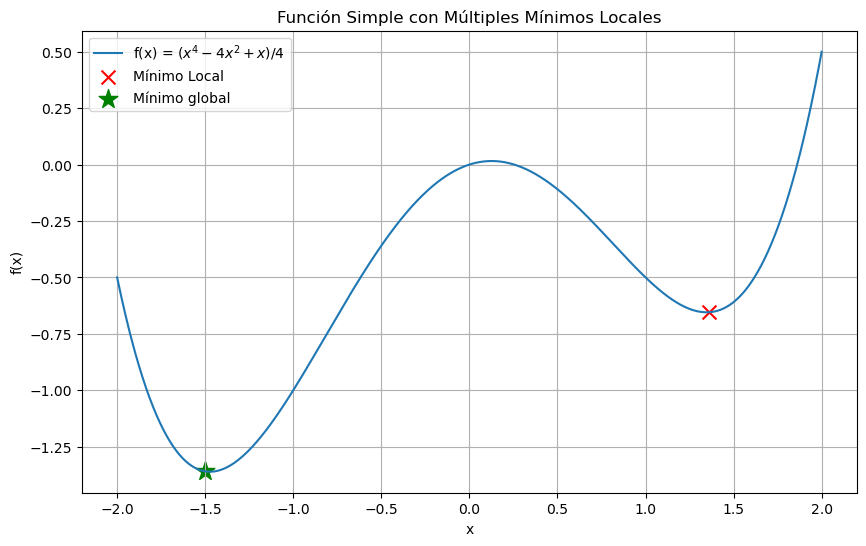

In [57]:
# Definir una función más sencilla con varios mínimos locales sin funciones trigonométricas
def simple_multimin_function(x):
    return (x ** 4 - 4 * x ** 2 + x) / 4

# Generar los valores de x y calcular los valores de la función
x_values = np.linspace(-2, 2, 1000)
y_values = simple_multimin_function(x_values)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = $(x^4 - 4x^2 + x) / 4$")
plt.scatter(1.36, -0.655, marker='x', color="red", s=100, label="Mínimo Local")
plt.scatter(-1.5, -1.36, marker='*', color="green", s=200, label="Mínimo global")
plt.title("Función Simple con Múltiples Mínimos Locales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

En la práctica la función de pérdida de las redes neuronales tienen cantidades grandes de mínimos locales.

<h2 style="color: #007ACC;"> Gradiente descendiente estocástico </h2>

En el gradiente descendiente estocástico cambiamos la tasa de aprendizaje en cada una de las epochs, de esta manera podemos evitar mínimos locales.

$$\mathbf{w}^{t + 1} = \mathbf{w}^{t} - \eta_{t} \nabla_{\mathbf{w}} L(\mathbf{w}^{t})$$

$\sum_{t = 1}^{\infty} \eta_{t} = \infty$ y $\sum_{t = 1}^{\infty} \eta^{2}_{t} < \infty$

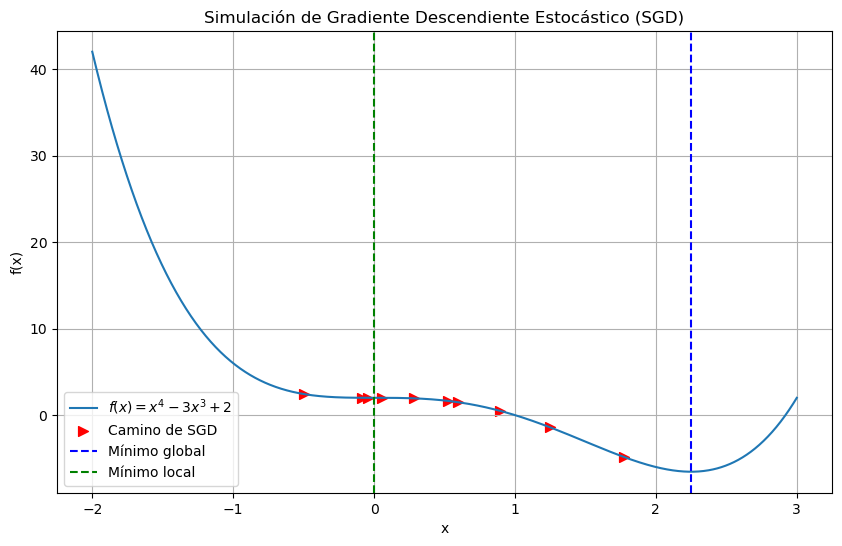

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo con múltiples mínimos locales
def objective_function(x):
    return x**4 - 3 * x**3 + 2

# Derivada de la función (gradiente)
def gradient(x):
    return 4 * x**3 - 9 * x**2

# Implementación del Gradiente Descendiente Estocástico
np.random.seed(0)
x_start = -0.5  # Punto inicial aleatorio
learning_rate_0 = 0.01
epochs = 9
path = [x_start]

x = x_start
for _ in range(1, epochs + 1):
    # Calcular el gradiente en el punto actual
    grad = gradient(x)

    # Actualizar x según el gradiente y la tasa de aprendizaje
    x = x - learning_rate * grad + np.random.normal(0, 0.1)  # Agregar ruido estocástico
    path.append(x)

# Generar valores para la gráfica de la función objetivo
x_values = np.linspace(-2, 3, 1000)
y_values = objective_function(x_values)

# Graficar la función y el camino de la optimización
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="$f(x) = x^4 - 3x^3 + 2$")
plt.scatter(path, [objective_function(x) for x in path], marker = '>', color="red", s=50, label="Camino de SGD")
#plt.plot(path, [objective_function(x) for x in path], color="red", linestyle="--")
plt.title("Simulación de Gradiente Descendiente Estocástico (SGD)")
plt.xlabel("x")
plt.ylabel("f(x)")

# Añadir líneas verticales en x = 9/4 y x = 0
plt.axvline(x=9/4, color="blue", linestyle="--", label="Mínimo global")
plt.axvline(x=0, color="green", linestyle="--", label="Mínimo local")

plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #007ACC;"> Gradiente descendiente estocástico por minilotes</h2>

El **algoritmo de gradiente estocástico por mini-lotes** (mini-batch SGD) es una variante del gradiente descendiente que equilibra precisión y eficiencia al calcular el gradiente usando pequeños subconjuntos de datos llamados *mini-lotes*. En lugar de calcular el gradiente en cada iteración usando todo el conjunto de datos (como en el método por lotes) o solo un dato individual (como en el gradiente estocástico clásico), mini-batch SGD selecciona un grupo de ejemplos aleatorios, usualmente entre 16 y 128 ejemplos, para calcular el gradiente y actualizar los parámetros del modelo. Esto permite una convergencia más rápida y estable al reducir la varianza del gradiente y la sobrecarga computacional. Los mini-lotes ayudan a suavizar las oscilaciones del gradiente estocástico clásico y permiten optimizaciones paralelas, mejorando la eficiencia en el entrenamiento de modelos de Machine Learning con grandes conjuntos de datos. Este enfoque es ampliamente utilizado en redes neuronales profundas y otros modelos de alto rendimiento debido a su capacidad para escalar y lograr un buen balance entre la velocidad de convergencia y la estabilidad del proceso de optimización.

La actualización de los parámetros en el **gradiente estocástico por mini-lotes** se define de la siguiente manera:

$$\theta_{t + 1} = \theta_{t} - \eta_{t} \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla J(\theta; x^{(i)}, y^{(i)})$$ 

en dónde $i$ es el i-ésimo minilote.

En este algoritmo, el gradiente se promedia sobre el mini-lote de \( m \) ejemplos, lo cual suaviza la dirección de actualización y mejora la estabilidad en comparación con el gradiente descendiente estocástico clásico, que usa solo un ejemplo en cada iteración.

<h2 style="color: #007ACC;"> Ejemplo de clasificación: datos Iris </h2>

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [4]:
# One-hot encode the target variable
encoder = OneHotEncoder(categories='auto')
y = encoder.fit_transform(y).toarray()

In [5]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

In [7]:
num_features = X.shape[1]


model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='relu')) # 10 neurons in the first hidden layer
model.add(Dense(8, activation='relu')) # 8 neurons in the second hidden layer
model.add(Dense(3, activation='softmax')) # 3 neurons in the output layer for the 3 classes

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/100


2024-05-30 13:04:05.652856: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


24/24 [==============================] - 0s 680us/step - loss: 1.6198 - accuracy: 0.1667
Epoch 2/100
24/24 [==============================] - 0s 554us/step - loss: 1.3475 - accuracy: 0.1250
Epoch 3/100
24/24 [==============================] - 0s 549us/step - loss: 1.2411 - accuracy: 0.0750
Epoch 4/100
24/24 [==============================] - 0s 534us/step - loss: 1.1882 - accuracy: 0.0250
Epoch 5/100
24/24 [==============================] - 0s 481us/step - loss: 1.1437 - accuracy: 0.0750
Epoch 6/100
24/24 [==============================] - 0s 520us/step - loss: 1.1103 - accuracy: 0.0583
Epoch 7/100
24/24 [==============================] - 0s 512us/step - loss: 1.0683 - accuracy: 0.0417
Epoch 8/100
24/24 [==============================] - 0s 479us/step - loss: 1.0285 - accuracy: 0.0750
Epoch 9/100
24/24 [==============================] - 0s 473us/step - loss: 0.9850 - accuracy: 0.1250
Epoch 10/100
24/24 [==============================] - 0s 484us/step - loss: 0.9468 - accuracy: 0.3917
E

In [11]:
print('Exactitud:', accuracy)

Exactitud: 0.9666666388511658


In [12]:
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred = model.predict(X_test)
# Convert predicted classes to one-hot encoding
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert true classes to one-hot encoding
y_true_classes = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 34ms/step


In [13]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


<h2 style="color: #007ACC;">Ejemplo de regresión: Casas de California </h2>

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# Load California housing dataset
housing = fetch_california_housing()

# Split dataset into features and target variable
X = housing.data
y = housing.target

In [16]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Define the regression model
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu')) # 20 neurons in the hidden layer
model.add(Dense(1)) # Single neuron in the output layer for regression

In [19]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=5)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

Epoch 1/50
3303/3303 [==============================] - 1s 312us/step - loss: 0.6592
Epoch 2/50
3303/3303 [==============================] - 1s 307us/step - loss: 0.4140
Epoch 3/50
3303/3303 [==============================] - 1s 306us/step - loss: 0.3947
Epoch 4/50
3303/3303 [==============================] - 1s 322us/step - loss: 0.3829
Epoch 5/50
3303/3303 [==============================] - 1s 325us/step - loss: 0.3719
Epoch 6/50
3303/3303 [==============================] - 1s 316us/step - loss: 0.3689
Epoch 7/50
3303/3303 [==============================] - 1s 324us/step - loss: 0.3591
Epoch 8/50
3303/3303 [==============================] - 1s 325us/step - loss: 0.3581
Epoch 9/50
3303/3303 [==============================] - 1s 322us/step - loss: 0.3540
Epoch 10/50
3303/3303 [==============================] - 1s 323us/step - loss: 0.3575
Epoch 11/50
3303/3303 [==============================] - 1s 327us/step - loss: 0.3445
Epoch 12/50
3303/3303 [==============================] - 1s 350

In [22]:
import matplotlib.pyplot as plt

129/129 [==============================] - 0s 290us/step


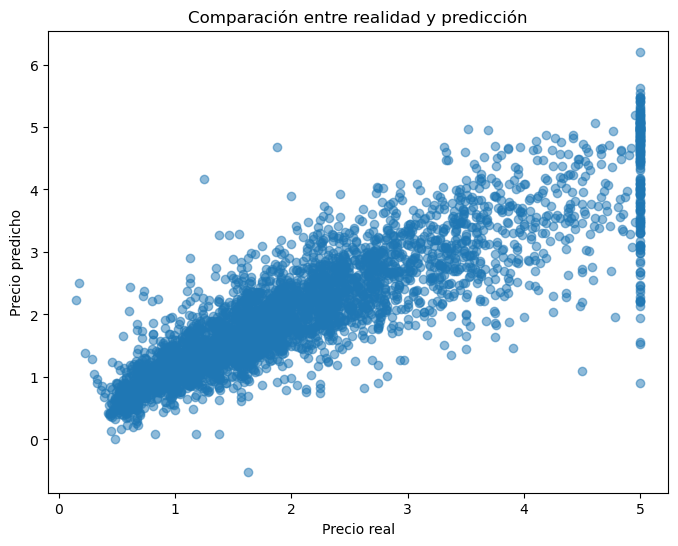

In [23]:
# Predict target values for test set
y_pred = model.predict(X_test_scaled).flatten()

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación entre realidad y predicción')
plt.show()

<h2 style="color: #007ACC;"> Ejemplo de clasificación: simulación </h2>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# Step 1: Generate Non-Linear Data
np.random.seed(42)
num_samples = 100
x = np.random.uniform(-10, 10, num_samples)
y = np.random.uniform(-10, 10, num_samples)
z_class = (5*y > x**2).astype(int)  # circular decision boundary

# Prepare the dataset
data = np.c_[x, y]
labels = z_class

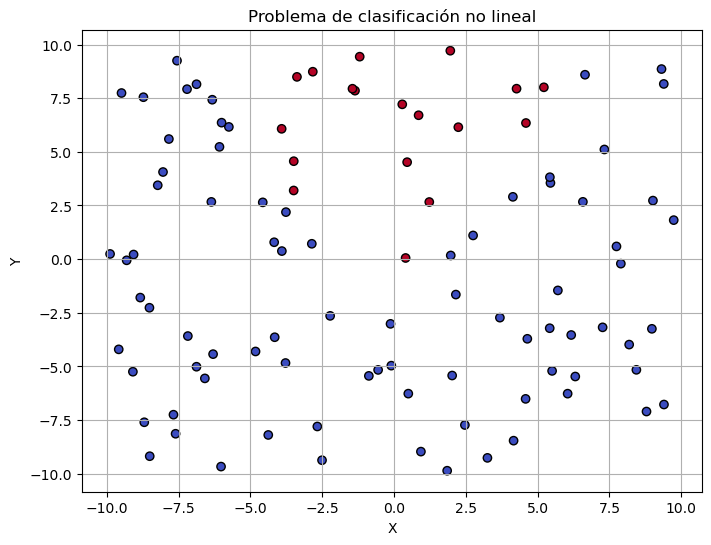

In [26]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', edgecolors='k')
plt.title('Problema de clasificación no lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [27]:
# Step 2: Define a More Complex Model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

313/313 [==============================] - 0s 281us/step


/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_4941/1889067915.py:19: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=[0.5], linestyles='--', colors='k')


313/313 [==============================] - 0s 283us/step


'img/keras_nonlinear_classification_training.gif'

313/313 [==============================] - 0s 311us/step


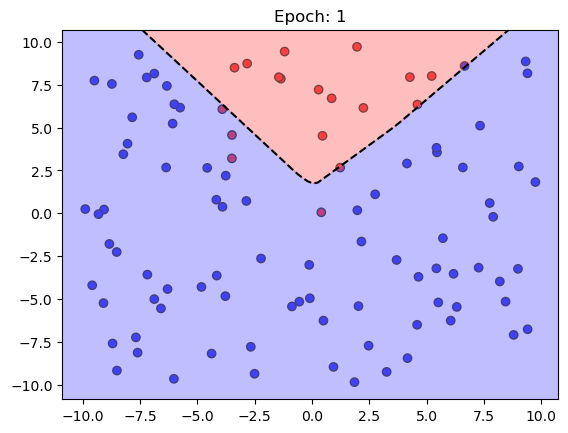

In [28]:
# Step 3: Train the Model and visualize
fig, ax = plt.subplots()

# Create a function to update the plot
def update(epoch):
    ax.clear()
    plt.scatter(x, y, c=z_class, cmap='bwr', edgecolor='k')
    plt.title(f'Epoch: {epoch+1}')
    # Train for one epoch
    model.fit(data, labels, epochs=1, verbose=0)
    
    # Plot decision boundary
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    ax.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.5, cmap='bwr')
    ax.contour(xx, yy, zz, levels=[0.5], linestyles='--', colors='k')

# Step 4: Create GIF
epochs = 80
ani = FuncAnimation(fig, update, frames=epochs, repeat=False)
writer = PillowWriter(fps=5)
gif_path = "img/keras_nonlinear_classification_training.gif"
ani.save(gif_path, writer=writer)

gif_path

In [91]:
from IPython.display import Image, display, HTML
HTML('<img src="../img/keras_nonlinear_classification_training.gif" />')

<h2 style="color: #007ACC;"> Ejemplo de regresión: simulación </h2>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Generate Data
np.random.seed(42)
num_samples = 100
x = np.random.uniform(-10, 10, num_samples)
y = np.random.uniform(-10, 10, num_samples)
z = x * y  # non-linear relationship

# Prepare the dataset
data = np.c_[x, y]
labels = z

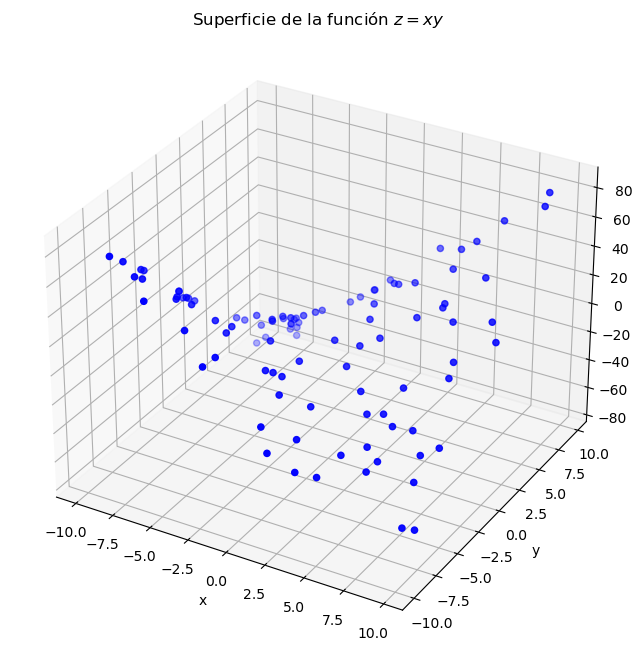

In [31]:
# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data[:, 0], data[:, 1], labels, c='b', marker='o')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Superficie de la función $z = xy$')

plt.show()

313/313 [==============================] - 0s 324us/step


'img/perceptron_regression_training.gif'

313/313 [==============================] - 0s 306us/step


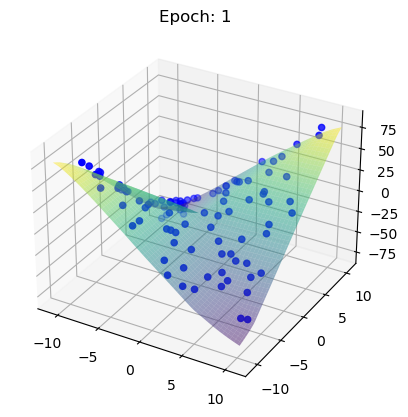

In [32]:
# Step 2: Define the Model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the Model and visualize
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a function to update the plot
def update(epoch):
    ax.clear()
    ax.scatter(x, y, z, c='b', marker='o')
    plt.title(f'Epoch: {epoch+1}')
    # Train for one epoch
    model.fit(data, labels, epochs=1, verbose=0)
    
    # Plot regression surface
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis')

# Step 4: Create GIF
epochs = 70
ani = FuncAnimation(fig, update, frames=epochs, repeat=False)
writer = PillowWriter(fps=5)
gif_path = "img/perceptron_regression_training.gif"
ani.save(gif_path, writer=writer)

gif_path


In [92]:
from IPython.display import Image, display, HTML
HTML('<img src="../img/perceptron_regression_training.gif" />')

<h2 style="color: #007ACC;">Referencias</h2>

- Capítulo 4 del libro Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow, de Aurélien Géron. Repositorio disponible en: https://github.com/ageron/handson-ml3/tree/main

- Capítulo 4 del libro Fundamentals of Deep Learning de Nikhil Buduma.

- Sección de Matemáticas y Estadística de la IA del Diplomado IA y AP - Avanzado de la Universidad Nacional y la empresa Aprendizaje Profundo, dictado por los expertos Álvaro Montenegro Díaz y Daniel Montenegro Reyes. Repositorio disponible en: https://github.com/AprendizajeProfundo/Diplomado